## Advanced Linear Regression

### EDA (Exploratory Data Analysis)

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # Binary target: 0 (benign), 1 (malignant)

In [2]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


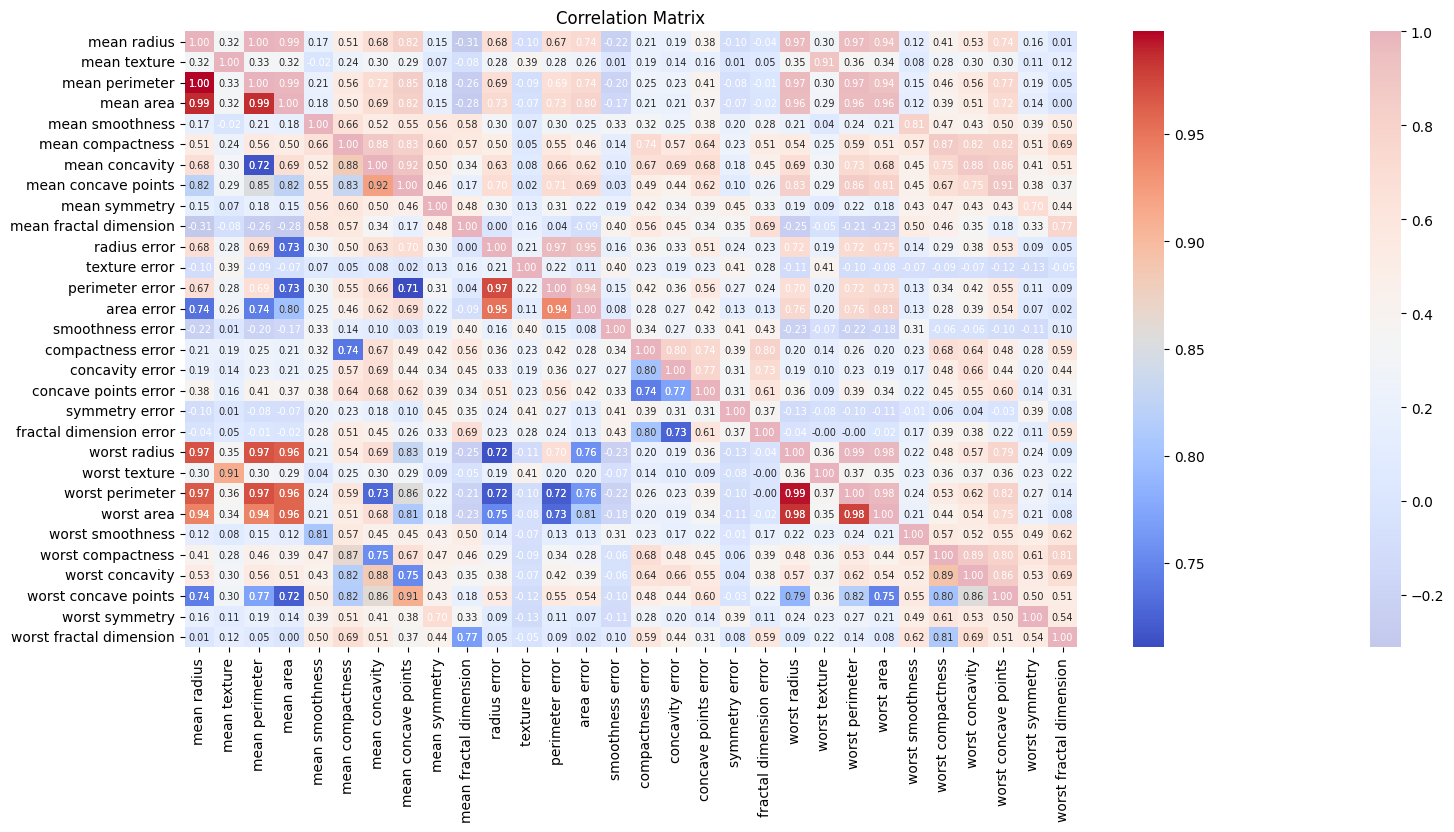

In [29]:
# Plot correlation matrix with highlighted high correlations
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create correlation matrix
corr_matrix = X.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True  # Mask upper triangle to avoid redundancy
mask[np.abs(corr_matrix) < 0.7] = True   # Mask correlations below threshold

plt.figure(figsize=(18, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            annot_kws={"size": 7}, alpha=0.3)
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', 
            fmt='.2f', annot_kws={"size": 7})
plt.title('Correlation Matrix')
plt.show()


**Radius:** Distance from the center to points on the perimeter of the cell nucleus

**Texture:** Measures the variation in gray-scale values (local variations in pixel intensities)

**Perimeter:** The total length of the boundary of the cell nucleus

**Area:** The total number of pixels in the cell nucleus

**Smoothness:** Local variation in radius lengths (how smooth or irregular the contour is)

**Compactness:** (Perimeter² / Area) - 1.0 (measures how compact the cell is)

**Concavity:** Severity of concave portions of the contour

**Concave points:** Number of concave portions of the contour

**Symmetry:** How symmetrical the cell nucleus is

**Fractal dimension:** A measure of the complexity of the cell boundary ("coastline approximation")


In [4]:
X.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

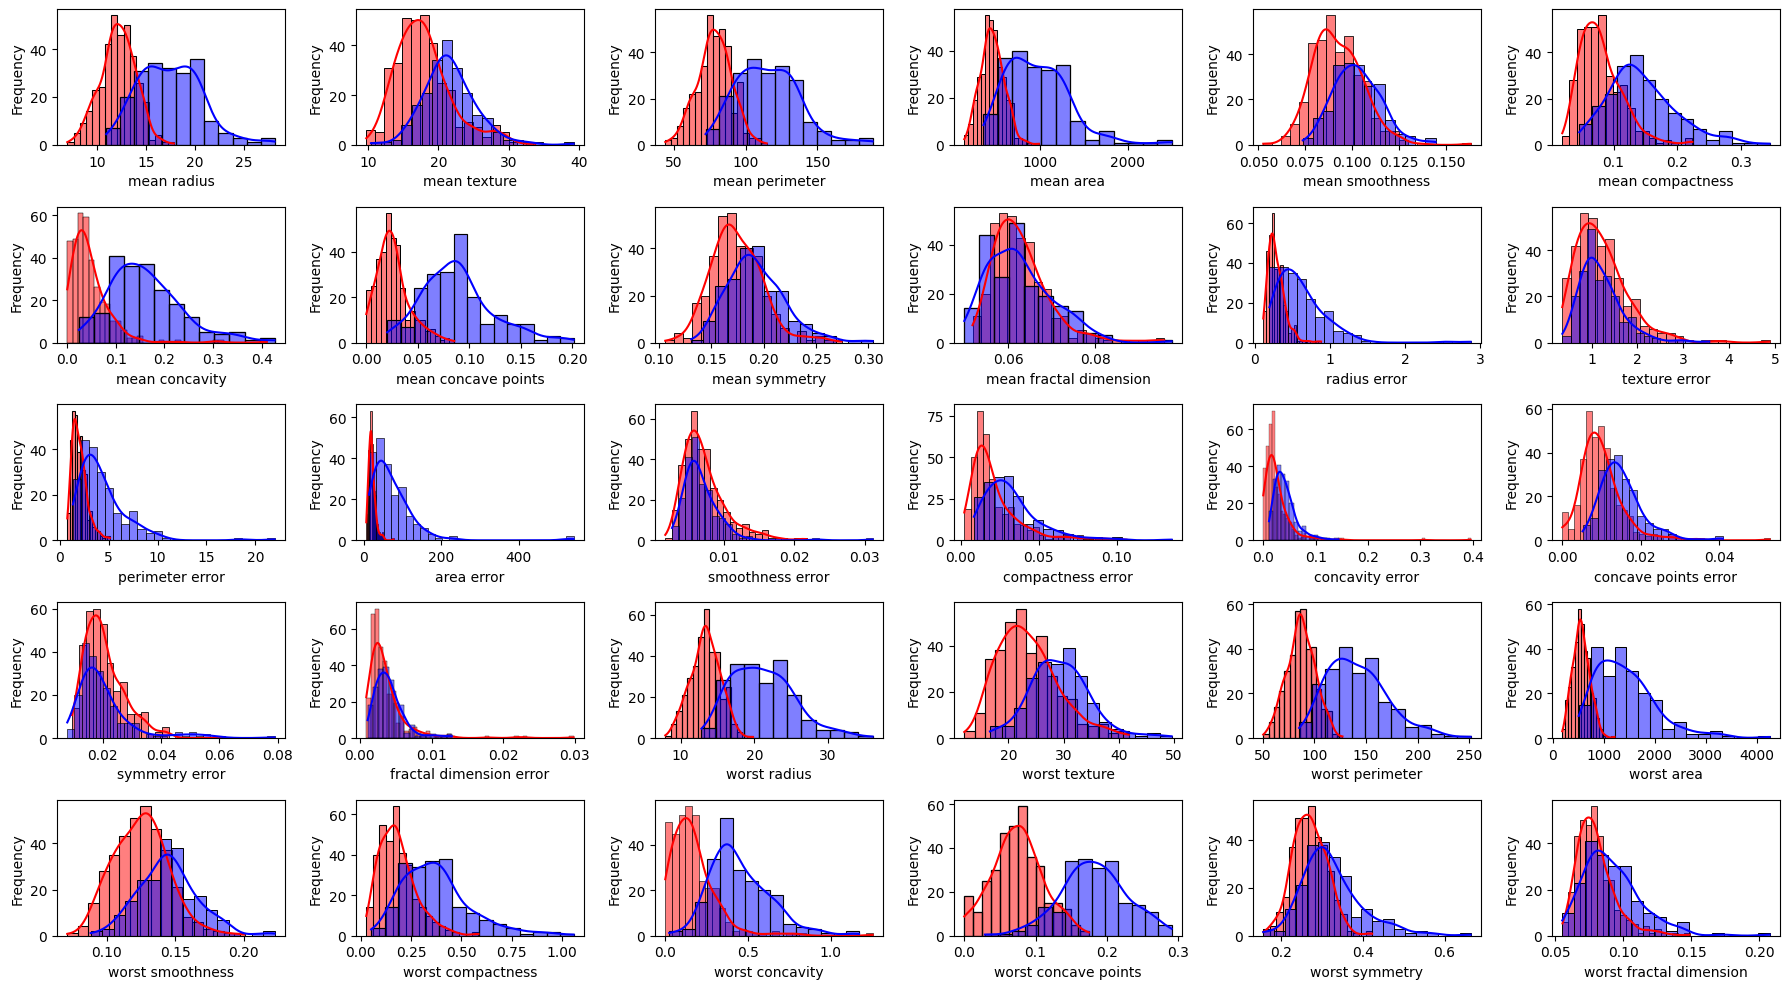

In [49]:
fig, ax = plt.subplots(figsize=(18, 10),nrows=5,ncols=6)
ax = ax.flatten()
malignant_index = np.where(y==1)[0]
benign_index = np.where(y==0)[0]
for i,var in enumerate(X.columns):
    values = X[var].values
    sns.histplot(values[malignant_index], ax=ax[i],kde=True,color='red',alpha=0.5)
    sns.histplot(values[benign_index], ax=ax[i],kde=True,color='blue',alpha=0.5)
    ax[i].set_xlabel(var)
    ax[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

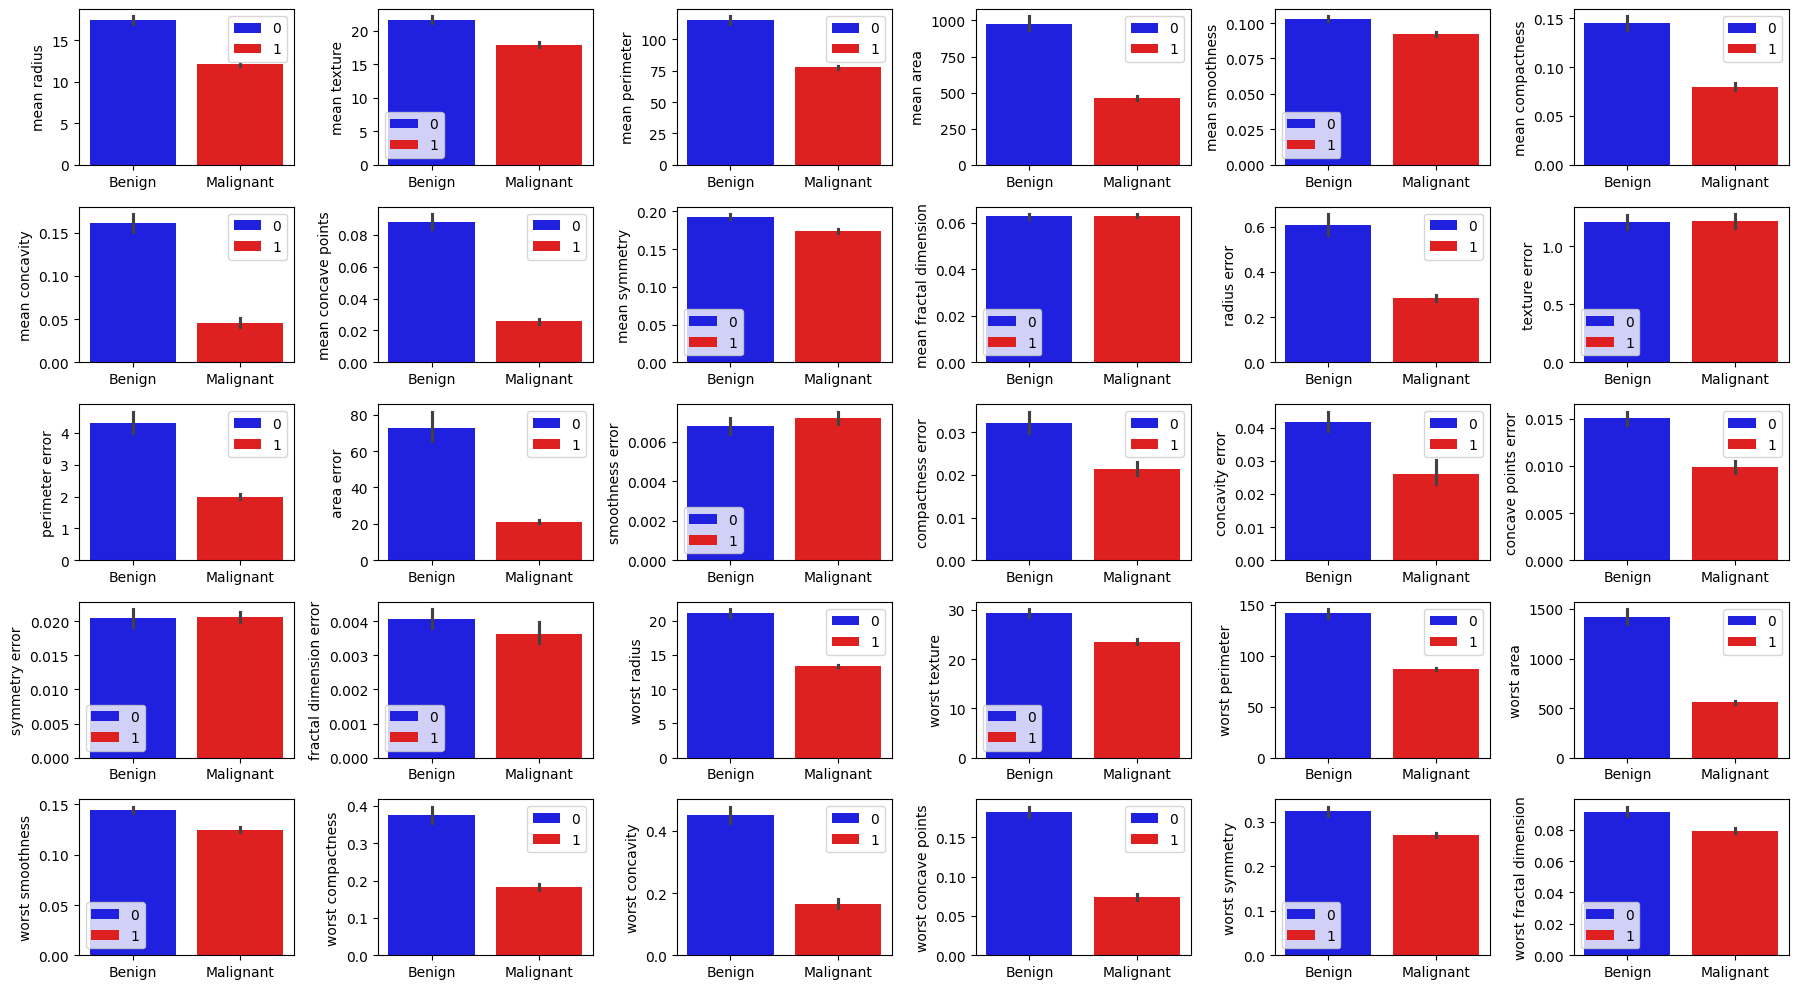

In [27]:
fig, ax = plt.subplots(figsize=(18, 10),nrows=5,ncols=6)
ax = ax.flatten()
for i,var in enumerate(X.columns):
    sns.barplot(x=y,y=X[var],ax=ax[i],hue=y,palette=['blue','red'])
    #ax[i].set_xticks([],labels=["Benign","Malignant"])
    ax[i].set_xticks([0,1],labels=["Benign","Malignant"])
    ax[i].set_ylabel(var)
plt.tight_layout()
plt.show()

/var/folders/xs/v6q3rmcj5211sjzbgfbphbfm0000gp/T/ipykernel_87730/2167625932.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.Series(y).value_counts().index, y=pd.Series(y).value_counts().values,palette=['blue','red'])


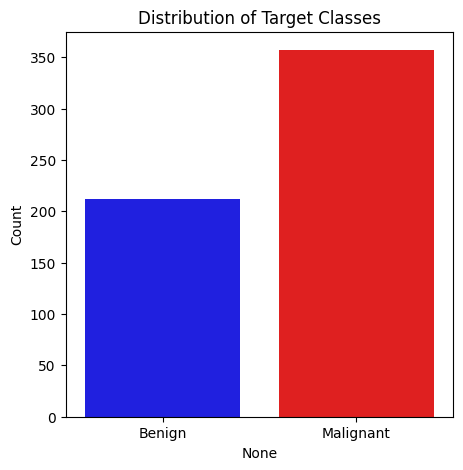

In [48]:
plt.figure(figsize=(5,5))
sns.barplot(x=pd.Series(y).value_counts().index, y=pd.Series(y).value_counts().values,palette=['blue','red'])
plt.title('Distribution of Target Classes')
plt.xticks(ticks=[0,1],labels=["Benign","Malignant"])
plt.ylabel('Count')
plt.show()


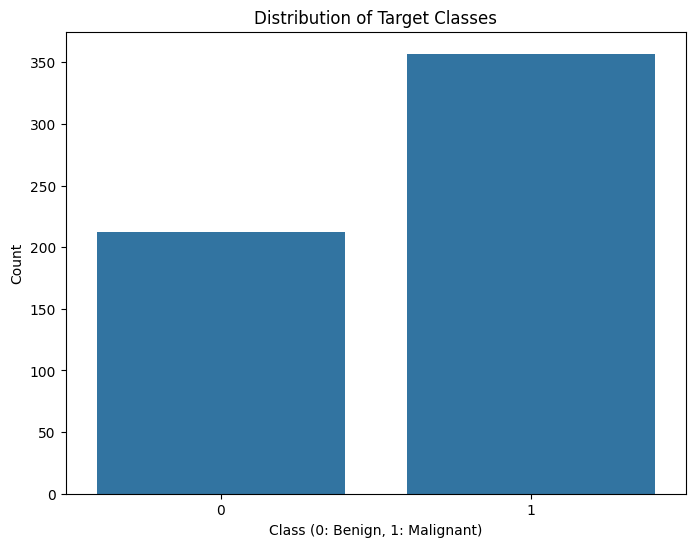

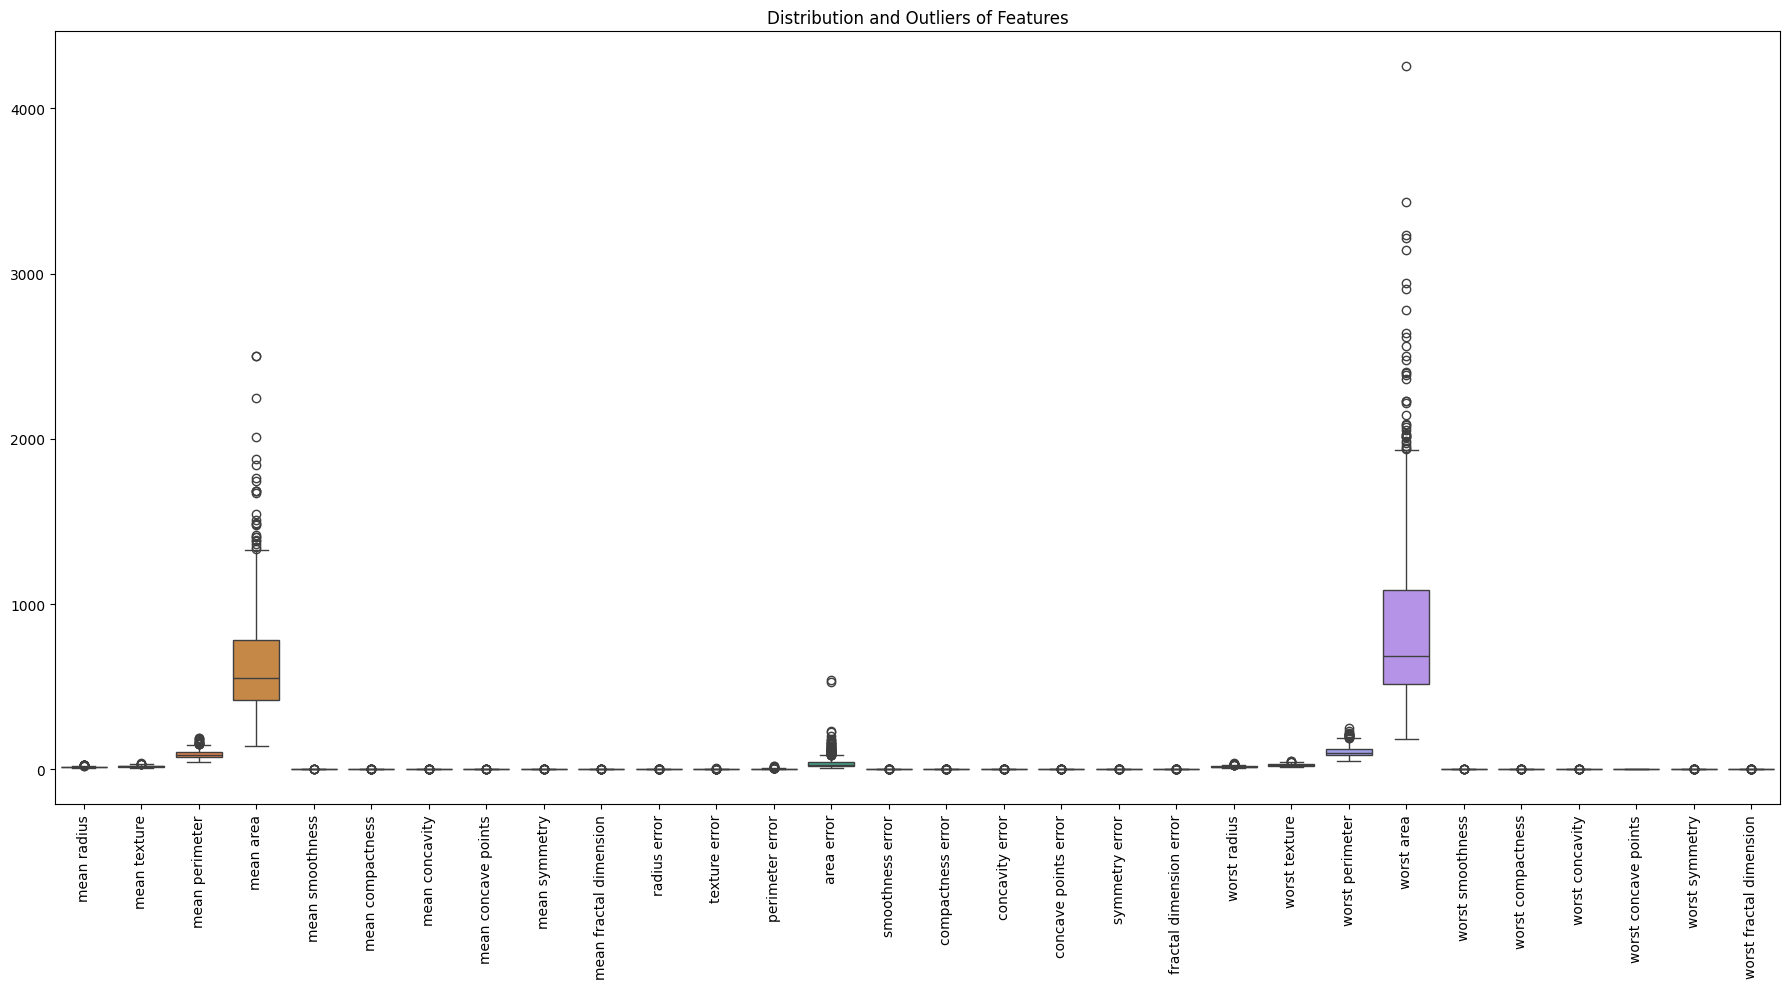

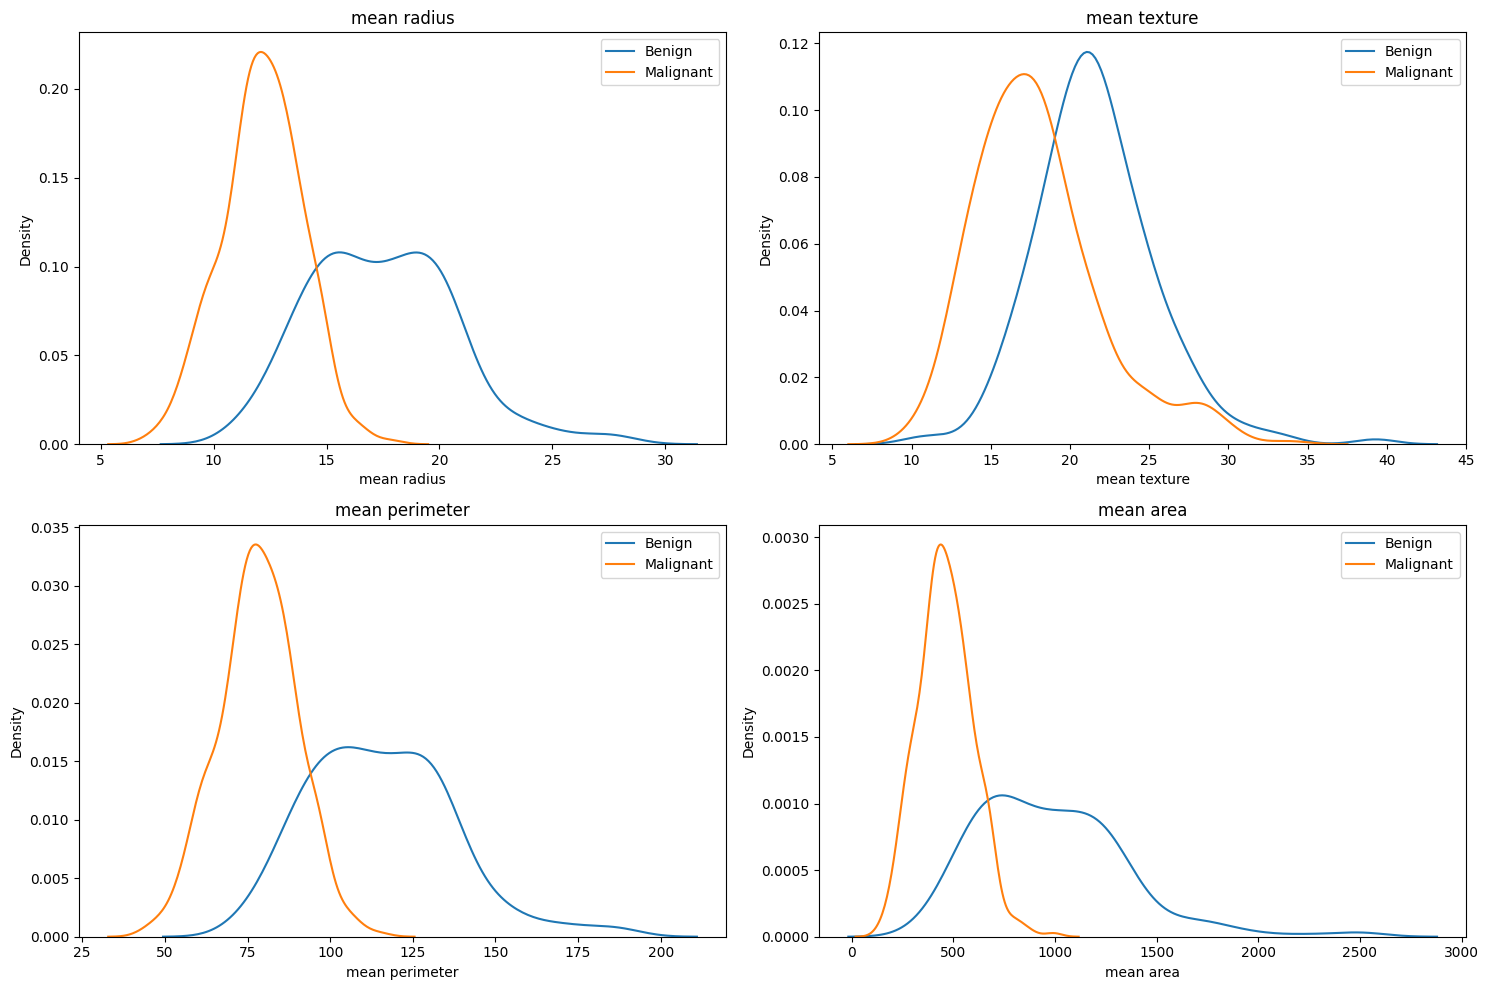

Statistical Summary by Class:

Benign (Class 0):
       mean radius  mean texture  mean perimeter  mean area  mean smoothness
count       212.00        212.00          212.00     212.00           212.00
mean         17.46         21.60          115.37     978.38             0.10
std           3.20          3.78           21.85     367.94             0.01
min          10.95         10.38           71.90     361.60             0.07
25%          15.08         19.33           98.74     705.30             0.09
50%          17.33         21.46          114.20     932.00             0.10
75%          19.59         23.76          129.93    1203.75             0.11
max          28.11         39.28          188.50    2501.00             0.14

Malignant (Class 1):
       mean radius  mean texture  mean perimeter  mean area  mean smoothness
count       357.00        357.00          357.00     357.00           357.00
mean         12.15         17.91           78.08     462.79             0.09
std  

In [41]:

# 2. Box plots to identify outliers
plt.figure(figsize=(18, 10))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title('Distribution and Outliers of Features')
plt.tight_layout()
plt.show()

# 3. Feature distributions by class with KDE
# Select a few important features for demonstration
important_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(important_features):
    sns.kdeplot(data=X[feature][y == 0], label='Benign', ax=axes[idx])
    sns.kdeplot(data=X[feature][y == 1], label='Malignant', ax=axes[idx])
    axes[idx].set_title(feature)
    axes[idx].legend()
plt.tight_layout()
plt.show()

# 4. Statistical summary by class
def print_class_stats(X, y):
    print("Statistical Summary by Class:")
    print("\nBenign (Class 0):")
    print(X[y == 0].describe().round(2))
    print("\nMalignant (Class 1):")
    print(X[y == 1].describe().round(2))
    
# Print summary for first 5 features only to avoid cluttering
print_class_stats(X[X.columns[:5]], y)

# 5. Feature skewness analysis
skewness = X.skew().sort_values(ascending=False)
print("\nFeature Skewness:")
print(skewness)